In [1]:
import numpy as np
import matplotlib.pyplot as plt

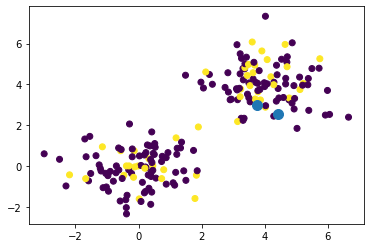

In [48]:
N = 200


X1 = np.random.randn(N//2, 2)
X2 = np.random.randn(N//2, 2) + 4
X = np.concatenate((X1, X2), axis=0)

rn = np.zeros((N, 2))

for i in range(N):
  nr = np.random.randint(0, 10)
  if(nr>=8):
    rn[i, 1] = 1
  else: 
    rn[i, 0] = 1

plt.scatter(X[:, 0], X[:, 1], c=r)

mus = X[np.random.permutation(N)[:2], :]

plt.scatter(mus[:, 0], mus[:, 1], s=100)


In [10]:
#!pip install parfor

In [47]:

def J():
  value = 0
  for i in range(N):
    for k in range(2):
      value += rn[i, k] * np.sum((X[i, :] - mus[:, k])**2)

tic = datetime.now()
s = J()
toc = datetime.now()
print(toc - tic)



0:00:00.006097


In [45]:
from time import sleep
from parfor import parfor
from datetime import datetime

batches = 100
batch_size = N // batches

tic = datetime.now()

@parfor(range(batches))
def fun(i):
    J = 0
    for x in range(i*batch_size, i*batch_size + batch_size):
      for k in range(2):
        J += rn[x, k] * np.sum((X[x, :] - mus[:, k])**2)
    return J

arr = np.array(fun)
s = np.sum(arr)
toc = datetime.now()


print(toc - tic)

  0%|          | 0/100 [00:00<?, ?it/s]

0:00:22.326234


In [42]:
s

18524035.073626414